
## PCA and SVD - What's the Connection?

### What is PCA?

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a dataset while preserving as much variance as possible. It transforms the data into a new coordinate system such that:
- The first axis (principal component) explains the most variance,
- The second axis (next principal component) explains the next most, and so on.

### Why PCA?

- Compress data without losing too much information
- Visualize high-dimensional datasets in 2D or 3D
- Remove noise or redundant features

---

### What is SVD?

Singular Value Decomposition (SVD) is a mathematical technique used to factorize a real (or complex) matrix \( A \) into three matrices:

$$
A = U \Sigma V^T
$$

Where:
- $U \in \mathbb{R}^{m \times m}$ : Left singular vectors (orthonormal columns)
- $\Sigma \in \mathbb{R}^{m \times n}$: Diagonal matrix with singular values
- $V \in \mathbb{R}^{n \times n}$: Right singular vectors (orthonormal rows of $V^T$)

---

### How is PCA related to SVD?

PCA is typically done by:
1. Standardizing the data (mean = 0 and variance = 1)
2. Computing the covariance matrix $C = \frac{1}{n-1}X^T X$
3. Getting the eigenvectors and eigenvalues of $C$

But **SVD gives us everything we need**:
- If $X$ is the standardized data matrix, then:
  - Columns of $V$ from the SVD of $X$ are the **principal directions**
  - Singular values in $\Sigma$ give us the **explained variance**

So:
- **Principal Components** = $X V$

- **Explained Variance** = $\frac{\Sigma^2}{n - 1}$

**In short:** PCA is a special application of SVD to centered data!

---



### Exercise 1: Manual SVD Decomposition (2x2 Matrix)


In [ ]:

import numpy as np

# Define a simple 2x2 matrix
A = np.array([[3, 1],
              [1, 3]])
print("Matrix A:")
print(A)



**Exercise 1:** Compute the SVD of this matrix by hand.  
(Hint: Compute $A^T A$, find eigenvalues/vectors, and then follow the SVD process we discussed in class.)


### SVD and PCA in Python


### The Iris Dataset: Description and Use Case

The **Iris dataset** is one of the most famous and widely used datasets in machine learning and statistics. It was introduced by the British biologist and statistician **Ronald Fisher** in 1936.

#### Dataset Description:

- **Samples**: 150 flower samples
- **Classes**: 3 species of the Iris flower:
  - *Iris setosa*
  - *Iris versicolor*
  - *Iris virginica*
- **Features** (all continuous and measured in centimeters):
  1. Sepal Length
  2. Sepal Width
  3. Petal Length
  4. Petal Width

Each sample is labeled with its corresponding species, making this a **multiclass classification** dataset.

---

#### Use Case:

The Iris dataset is often used to:
- Demonstrate and test **classification algorithms** (e.g., logistic regression, k-NN, decision trees, SVM)
- Apply **dimensionality reduction techniques** such as PCA or t-SNE
- Explore basic **data visualization** techniques (scatter plots, pairplots)
- Teach foundational concepts in **machine learning**, **statistics**, and **pattern recognition**



## Singular Values and Explained Variance:

### SVD:
When you perform Singular Value Decomposition (SVD) on a matrix $X$ (with dimensions $N \times D$), the singular values $\sigma_1, \sigma_2, \dots, \sigma_r$ represent the strength or magnitude of each principal component. These singular values correspond to the square roots of the eigenvalues of the matrix $X^T X$.

### PCA:
In Principal Component Analysis (PCA), the explained variance for each component is proportional to the eigenvalues of the covariance matrix. The explained variance can be directly related to the square of the singular values from SVD.

### Relationship:
Given the matrix $X$, where:

- $X$ is the data matrix of size $N \times D$ (with $N$ samples and $D$ features),
- The singular values from SVD are $\sigma_1, \sigma_2, \dots, \sigma_r$,
- The eigenvalues of the covariance matrix $X^T X$ are $\lambda_1, \lambda_2, \dots, \lambda_r$,

the following relationship holds:

$$ \lambda_i = \sigma_i^2 \quad \text{for each principal component} \ i. $$

The eigenvalues $\lambda_i$ correspond to the explained variance in PCA. So, the square of the singular values gives the eigenvalues (and thus the explained variance in PCA).

### How to Relate SVD Singular Values to PCA Explained Variance:
If you want to get the explained variance using SVD, you can do it as follows:

1. **Compute SVD**: Perform Singular Value Decomposition on the scaled data matrix $X$.
2. **Square the Singular Values**: The squared singular values correspond to the eigenvalues of the covariance matrix.
3. **Normalize the explained variance**: In PCA, the explained variance is usually normalized, so we divide by the total sum of squared singular values.


## Comparison of Singular Value Decomposition (SVD) and Principal Component Analysis (PCA)

In this section, we compare two techniques: Singular Value Decomposition (SVD) and Principal Component Analysis (PCA). Both are used for dimensionality reduction and feature extraction, and they are closely related. We will use the Iris dataset to demonstrate the concepts.

### Data Standardization

Before applying either SVD or PCA for these types of calculations, it is important to standardize the data, especially when the features have different scales. Standardization ensures that each feature has a mean of 0 and a standard deviation of 1, making all features contribute equally to the analysis. We can perform this using the following formula:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

where $X$ is the original data matrix, $\mu$ is the mean of each feature, and $\sigma$ is the standard deviation of each feature.

### Comparison Between SVD and PCA

Both SVD and PCA are related and can be used for dimensionality reduction. In fact, PCA can be seen as a special case of SVD, where SVD is applied to the covariance matrix or the standardized data matrix.

- **SVD** decomposes the data matrix $X$ into $U$, $\Sigma$, and $V^T$, where the singular values in $\Sigma$ correspond to the variance captured by each component.
- **PCA** directly computes the eigenvectors and eigenvalues of the covariance matrix and provides the explained variance for each principal component.

The key difference is that PCA directly provides the explained variance, which tells us how much of the original data's variability is captured by each component. In contrast, SVD gives us the singular values, which we can square to obtain the explained variance.


## Run the code below to see how PCA and SVD are related

In [25]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load and standardize data
data = load_iris()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

# Apply SVD using NumPy
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

# Show singular values
print("Singular values:", S)

# Step 1: Compute eigenvalues (squared singular values)
eigenvalues_svd = S ** 2
print("Eigenvalues from SVD (squared singular values):", eigenvalues_svd)

# Step 2: Normalize the explained variance (by total variance)
total_variance = np.sum(eigenvalues_svd)  # Total variance (sum of eigenvalues)
explained_variance_svd = eigenvalues_svd / total_variance  # Normalize by total variance
print("Explained variance from SVD (normalized):", explained_variance_svd)

# Compare to PCA
pca = PCA()
pca.fit(X_scaled)
print("Explained variance from PCA:", pca.explained_variance_ratio_)


Singular values: [20.92306556 11.7091661   4.69185798  1.76273239]
Eigenvalues from SVD (squared singular values): [437.77467248 137.10457072  22.01353134   3.10722546]
Explained variance from SVD (normalized): [0.72962445 0.22850762 0.03668922 0.00517871]
Explained variance from PCA: [0.72962445 0.22850762 0.03668922 0.00517871]


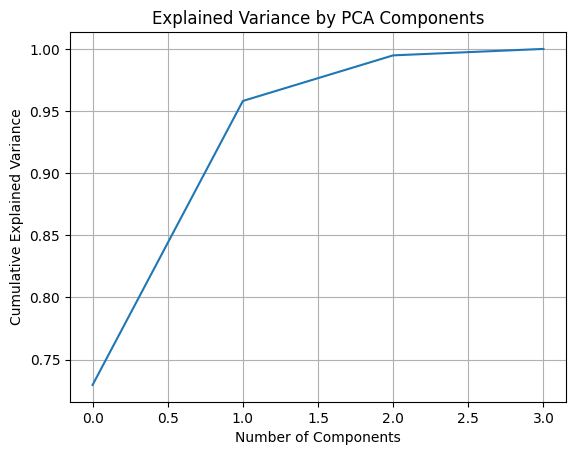

In [24]:

import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


### Understanding Explained Variance in PCA (with the Iris Dataset)

When we apply PCA to a dataset like the **Iris dataset**, we transform our original features (sepal length, sepal width, petal length, petal width) into **principal components** — new, uncorrelated variables that are linear combinations of the original features.

Each **principal component** captures a certain amount of the **total variance** in the data. The **explained variance** tells us **how much information (variance)** is retained by each principal component.

---

#### Mathematically:

Let $X \in \mathbb{R}^{n \times d}$ be the standardized data matrix with:
- $ n = 150 $: number of samples in the Iris dataset  
- $ d = 4 $: number of original features

We perform SVD:

$$
X = U \Sigma V^T
$$

Then:
- The **squared singular values** $ \sigma_i^2 $ from $ \Sigma $ correspond to the variance captured by each principal component.
- The **explained variance ratio** for component $ i $ is:

$$
\text{Explained Variance Ratio}_i = \frac{\sigma_i^2}{\sum_j \sigma_j^2}
$$

This ratio tells us the **proportion of the total dataset variance** that is captured by component $ i $.

---

#### Example (Iris Dataset):

- **PC1** might explain ~72% of the variance  
- **PC2** might explain ~23%  
- Together, PC1 and PC2 capture ~95% of the total variance

So, by projecting the Iris data onto just the first two principal components, we:
- Retain most of the structure in the data  
- Simplify our model by reducing dimensionality from 4 inputs (features) to just 2  
- Can visualize the data in 2D while still preserving key relationships

---

### Why This Matters for Modeling:

- **Dimensionality Reduction**: PCA reduces the number of input features while keeping the most informative ones. This helps prevent overfitting and speeds up training.
- **Noise Filtering**: Lower-variance components often capture noise. Removing them improves model robustness.
- **Feature Engineering**: The principal components can serve as **new, compact features** for downstream machine learning models.
- **Visualization**: In datasets like Iris, PCA allows for meaningful 2D plots that reveal class structure.



## Visualizing PCA
- Run the code below to see the iris dataset after dimensionality reduction to just two principal components

In [ ]:

# Project data onto first 2 principal components
X_pca = pca.transform(X_scaled)[:, :2]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.show()


### Visualizing PCA on the Iris Dataset: Synopsis

After performing PCA on the Iris dataset, we can project the original 4-dimensional feature space (sepal and petal measurements) into a new 2D space defined by the **first two principal components**.

#### What We See in the Visualization:

- **Each point** represents a single flower sample.
- **Axes**: The x-axis is the **first principal component (PC1)**, and the y-axis is the **second principal component (PC2)**.
- **Colors** represent the true species labels: *Setosa*, *Versicolor*, and *Virginica*.

---

#### Key Insights:

- **PC1** captures most of the variance in the data (~72%), while **PC2** captures a significant portion (~23%).
- **Setosa** is clearly separated from the other two species, indicating it has distinctive measurements.
- **Versicolor** and **Virginica** overlap more, suggesting that PCA reveals some—but not all—of the class structure.

---

#### Interpretation:

This PCA plot shows that:
- We can reduce the dataset from 4 to 2 dimensions with minimal loss of information.
- PCA helps uncover patterns and structure in the data that may not be obvious in the original feature space.
- Such visualization is helpful for **exploratory data analysis**, **feature selection**, and understanding the **separability of classes** before applying classification models.



## More Problems (Don't forget exercise 1 above)

#### Problem 1: Manually Decompose This 2x2 Matrix
```python
B = np.array([[4, 0],
              [3, -5]])
```
*Find its SVD by hand then check your answer using this code.*


In [12]:

B = np.array([[4, 0],
              [3, -5]])
U_b, S_b, VT_b = np.linalg.svd(B, full_matrices=False)



#### Problem 2: Use Python to Decompose a 5x5 Matrix $C$


In [13]:
import numpy as np

np.random.seed(42)
C = np.random.randint(0, 10, size=(5, 5))


#### Problem 3: Use SVD to decompose the following matrix into its SVD $U \Sigma V^{T}$; then check that the product $U \Sigma V^{T} = A$

In [14]:
import numpy as np

# Problem: Perform SVD on a 3x3 matrix
A = np.array([[4, 1, 2], [2, 3, 1], [1, 2, 3]])

#### Problem 4: Use SVD to decompose the following matrix into its SVD $U \Sigma V^{T}$; then check that the product $U \Sigma V^{T} = A$

In [15]:
import numpy as np

# Problem: Perform SVD on a 6x4 matrix
np.random.seed(0)
C = np.random.randint(0, 10, size=(6, 4))


#### Problem 5: Use SVD to decompose the following matrix into its SVD $U \Sigma V^{T}$; then check that the product $U \Sigma V^{T} = A$


#### Problem 6: Try PCA on a Custom Dataset
Try applying PCA via SVD to any dataset of your choice (you may use the code in this notebook). For example, you can use:
- `load_digits()` from `sklearn.datasets`
- A CSV file or any other type of file
